# Análisis Exploratorio y Prueba de Hipótesis del Proyecto #

En este proyecto análisaremos los datos y la prueba de hipótesis sobre viajes de taxis en Chicago,
utilizando datasets.

# Paso 4: Análisis Exploratorio de Datos #

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo.

Ahora tienes estos dos CSV:

#### project_sql_result_01.csv.    Contiene los siguientes datos:

- company_name: nombre de la empresa de taxis.

- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
    
#### project_sql_result_04.csv.    Contiene los siguientes datos:

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes.

- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
    

## Para estos dos datasets ahora necesitas ##

- Importar los archivos.
- Estudiar los datos que contienen.
- Asegurarte de que los tipos de datos sean correctos.
- Identificar los 10 principales barrios en términos de finalización.
- Hacer gráficos:                                                                                                                
  Empresas de taxis y número de viajes.                                                                                        
  Los 10 barrios principales por número de finalizaciones.
  
- Sacar conclusiones basadas en cada gráfico y explicar los resultados.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

##  Importar los archivos

In [2]:
# Cargar los archivos con los nombres correctos
df_taxis = pd.read_csv("moved_project_sql_result_01.csv")
df_barrios = pd.read_csv("moved_project_sql_result_04.csv")
df_trips = pd.read_csv("moved_project_sql_result_07.csv")

In [3]:
# Importar datos de la empresa de taxis
print("Datos de empresas de taxis:")
print(df_taxis.head())

Datos de empresas de taxis:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [4]:
# Importar datos de barrios
print("\nDatos de barrios:")
print(df_barrios.head())


Datos de barrios:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


##  Estudiar los datos que contienen

In [5]:
# Información general del dataset de empresas de taxis
print("Información de df_taxis:")
print(df_taxis.info())  # Muestra tipos de datos y valores nulos

# Información general del dataset de barrios
print("\nInformación de df_barrios:")
print(df_barrios.info())  # Muestra tipos de datos y valores nulos

Información de df_taxis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Información de df_barrios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [6]:
# Revisar valores nulos
print("Valores nulos en df_taxis:")
print(df_taxis.isnull().sum())

print("\nValores nulos en df_barrios:")
print(df_barrios.isnull().sum())

Valores nulos en df_taxis:
company_name    0
trips_amount    0
dtype: int64

Valores nulos en df_barrios:
dropoff_location_name    0
average_trips            0
dtype: int64


## Asegurarte de que los tipos de datos sean correctos

In [7]:
# Estadísticas generales de los datos
print(df_taxis.describe())  
print(df_barrios.describe())

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [8]:
print(df_taxis.dtypes)
print()
print(df_barrios.dtypes)

company_name    object
trips_amount     int64
dtype: object

dropoff_location_name     object
average_trips            float64
dtype: object


##  Hacer gráficos: Empresas de taxis y número de viajes

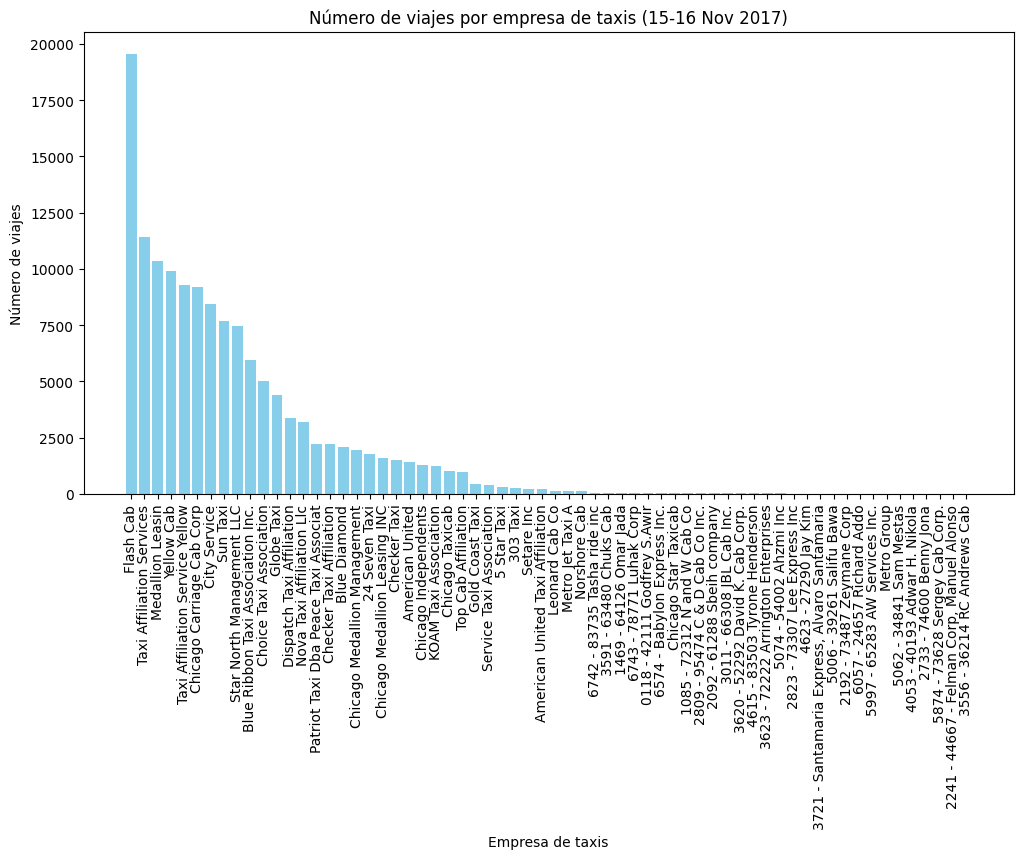

In [9]:
# Ordenar datos de mayor a menor
df_taxis_sorted = df_taxis.sort_values(by="trips_amount", ascending=False)

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.bar(df_taxis_sorted["company_name"], df_taxis_sorted["trips_amount"], color="skyblue")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visibilidad
plt.xlabel("Empresa de taxis")
plt.ylabel("Número de viajes")
plt.title("Número de viajes por empresa de taxis (15-16 Nov 2017)")
plt.show()

- El mercado de taxis en Chicago parece estar concentrado en unas pocas compañías líderes.
- Las 3 primeras empresas superan los 10 000 viajes.
- Flash Cab domina la competencia con una alta cantidad de viajes, lo que puede deberse a una mayor cantidad de vehículos,
tarifas competitivas o convenios con clientes.
- Las demás empresas tienen presencia, pero su participación es menor en comparación con las principales.

## Hacer gráficos los 10 barrios principales por número de finalizaciones.


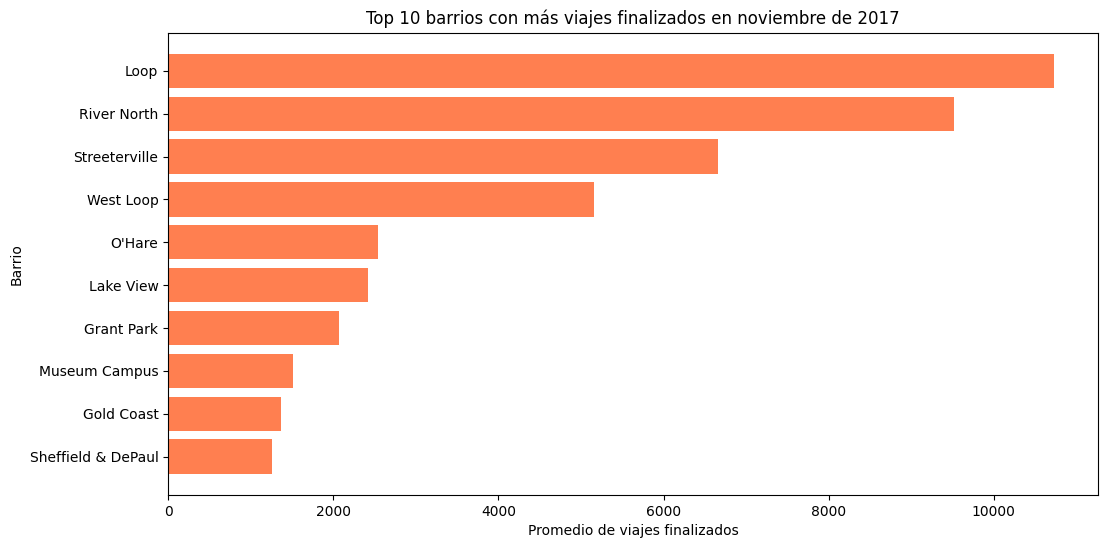

In [10]:
# Seleccionar los 10 barrios con más finalizaciones
df_top_barrios = df_barrios.sort_values(by="average_trips", ascending=False).head(10)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(df_top_barrios["dropoff_location_name"], df_top_barrios["average_trips"], color="coral")
plt.xlabel("Promedio de viajes finalizados")
plt.ylabel("Barrio")
plt.title("Top 10 barrios con más viajes finalizados en noviembre de 2017")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el barrio con más viajes aparezca arriba
plt.show()

- Los barrios con más viajes finalizados son zonas de alta actividad, posiblemente áreas comerciales o turísticas.
- Loop, como distrito financiero, probablemente reciba una gran cantidad de viajes por personas que trabajan allí.
- River North y Streeterville, conocidos por su vida nocturna y restaurantes, también tienen una fuerte demanda de taxis.
- O’Hare, al ser el aeropuerto principal, muestra un volumen significativo de viajes, aunque menor comparado con el centro de la ciudad.
- Teniendo en cuenta o mencionado visualizamos los barrios con mayor afluencia de viajes.

# Paso 5. Prueba de hipótesis (Python) #

- /datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:


- start_ts: fecha y hora de la recogida.
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje.
- duration_seconds: duración del viaje en segundos.

### Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

- Cómo planteaste las hipótesis nula y alternativa.
- Qué criterio usaste para probar las hipótesis y por qué.

 ### Exploracion del datasets #

In [ ]:
print(df_trips.head())
print()
print(df_trips.info())
print()
print(df_trips.isnull().sum())
print()
print(df_trips.describe()) 

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000

In [ ]:
# Convertir start_ts a formato datetime
df_trips["start_ts"] = pd.to_datetime(df_trips["start_ts"])

# Filtrar solo sábados
df_sabados = df_trips[df_trips["start_ts"].dt.dayofweek == 5]  # 5 representa sábado

# Dividir en días lluviosos y no lluviosos
df_lluviosos = df_sabados[df_sabados["weather_conditions"] == "Bad"]
df_no_lluviosos = df_sabados[df_sabados["weather_conditions"] == "Good"]

# Mostrar tamaño de cada grupo
print(f"Viajes en sábados lluviosos: {len(df_lluviosos)}")
print(f"Viajes en sábados no lluviosos: {len(df_no_lluviosos)}")
print(df_sabados["weather_conditions"].value_counts())

Viajes en sábados lluviosos: 180
Viajes en sábados no lluviosos: 888
Good    888
Bad     180
Name: weather_conditions, dtype: int64


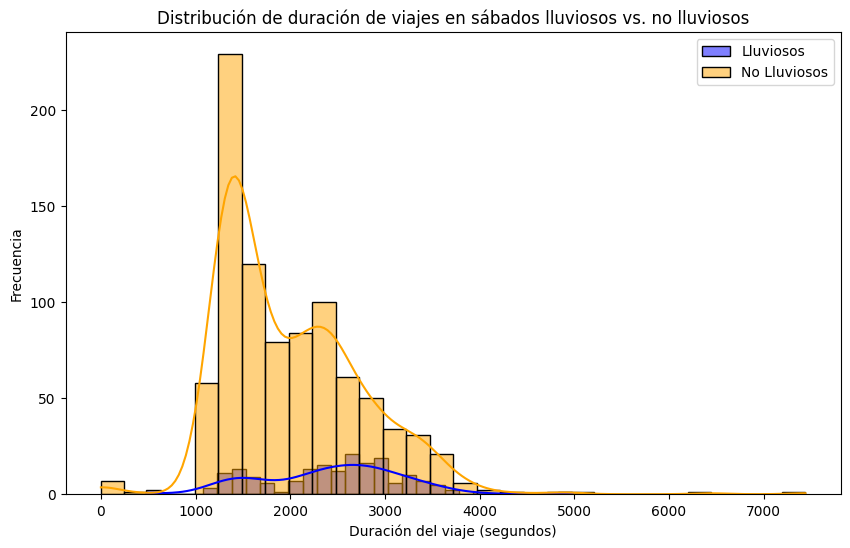

In [ ]:
# Crear histogramas de duración de viajes
plt.figure(figsize=(10, 6))
sns.histplot(df_lluviosos["duration_seconds"], color="blue", label="Lluviosos", kde=True, bins=30)
sns.histplot(df_no_lluviosos["duration_seconds"], color="orange", label="No Lluviosos", kde=True, bins=30)
plt.xlabel("Duración del viaje (segundos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de duración de viajes en sábados lluviosos vs. no lluviosos")
plt.legend()
plt.show()

In [ ]:


# Prueba t para comparar duración de viajes en sábados lluviosos y no lluviosos
t_stat, p_value = stats.ttest_ind(df_lluviosos["duration_seconds"], df_no_lluviosos["duration_seconds"], equal_var=False)

# Nivel de significación
alpha = 0.05  

# Mostrar resultados
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significación α: {alpha}")

# Tomar la decisión sobre la hipótesis
if p_value < alpha:
    print("Rechazamos la hipótesis nula: el clima afecta la duración del viaje.")
else:
    print("No podemos rechazar la hipótesis nula: el clima no afecta significativamente la duración del viaje.")

Estadístico t: 7.19
Valor p: 0.0000
Nivel de significación α: 0.05
Rechazamos la hipótesis nula: el clima afecta la duración del viaje.


### Cómo planteaste las hipótesis nula y alternativa

- #### Identificar el problema

Queríamos comprobar si la duración de los viajes entre Loop y el Aeropuerto Internacional O'Hare cambia en sábados lluviosos.
Este análisis nos ayuda a entender cómo el clima influye en los tiempos de traslado.

- #### Planteamiento de hipótesis

Para realizar una prueba estadística, formulamos dos hipótesis:
  - Hipótesis nula:
    "No hay diferencia significativa en la duración promedio de los viajes en sábados lluviosos y sábados no lluviosos." 
    Esto significa que el clima no afecta los tiempos de viaje. En otras palabras, cualquier diferencia observada podría deberse     al azar.
  - Hipótesis alternativa:
    "La duración promedio de los viajes sí cambia en sábados lluviosos."
    Esto implica que el clima sí influye en la duración del viaje. Si esta hipótesis se confirma, podríamos concluir que los         días lluviosos provocan tiempos de viaje más largos o diferentes patrones de tráfico.

- #### Método de prueba

Para comparar las duraciones de viaje en ambos grupos, utilizamos una prueba t de Student para muestras independientes.
Esto nos permitió evaluar si la diferencia de tiempos de viaje es estadísticamente significativa.


### Qué criterio usaste para probar las hipótesis y por qué?

- El criterio que usamos para probar las hipótesis fue la prueba t de Student para muestras independientes.
- Usamos la prueba t de Student es adecuada porque realizamos la comparación de dos grupos de datos independientes:
- Duración de viajes en sábados lluviosos.
- Duración de viajes en sábados no lluviosos.


En nuestro análisis, el valor p fue 0.0000, lo que nos permitió rechazar la hipótesis nula y confirmar que el clima impacta los tiempos de viaje los sábados lluviosos.


